In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

sns.set(style="darkgrid")

In [3]:
csvs = ["113_2012-07-01_2020-02-01.csv", "114_2012-07-01_2020-02-01.csv",
       "115_2012-07-01_2020-02-01.csv", "116_2012-07-01_2020-02-01.csv"]
meals_all = (pd.read_csv(csv, parse_dates=["date"]) for csv in csvs)
meals = pd.concat(meals_all, ignore_index=True)

# filter outliner with price > 9k
meals = meals[meals.price_student.le(10)]
meals["mensa_category"] = meals["mensa_id"].map(str) + ", " + meals["category"]

meals["price_mean"] = meals["price_student"].rolling(50).mean()

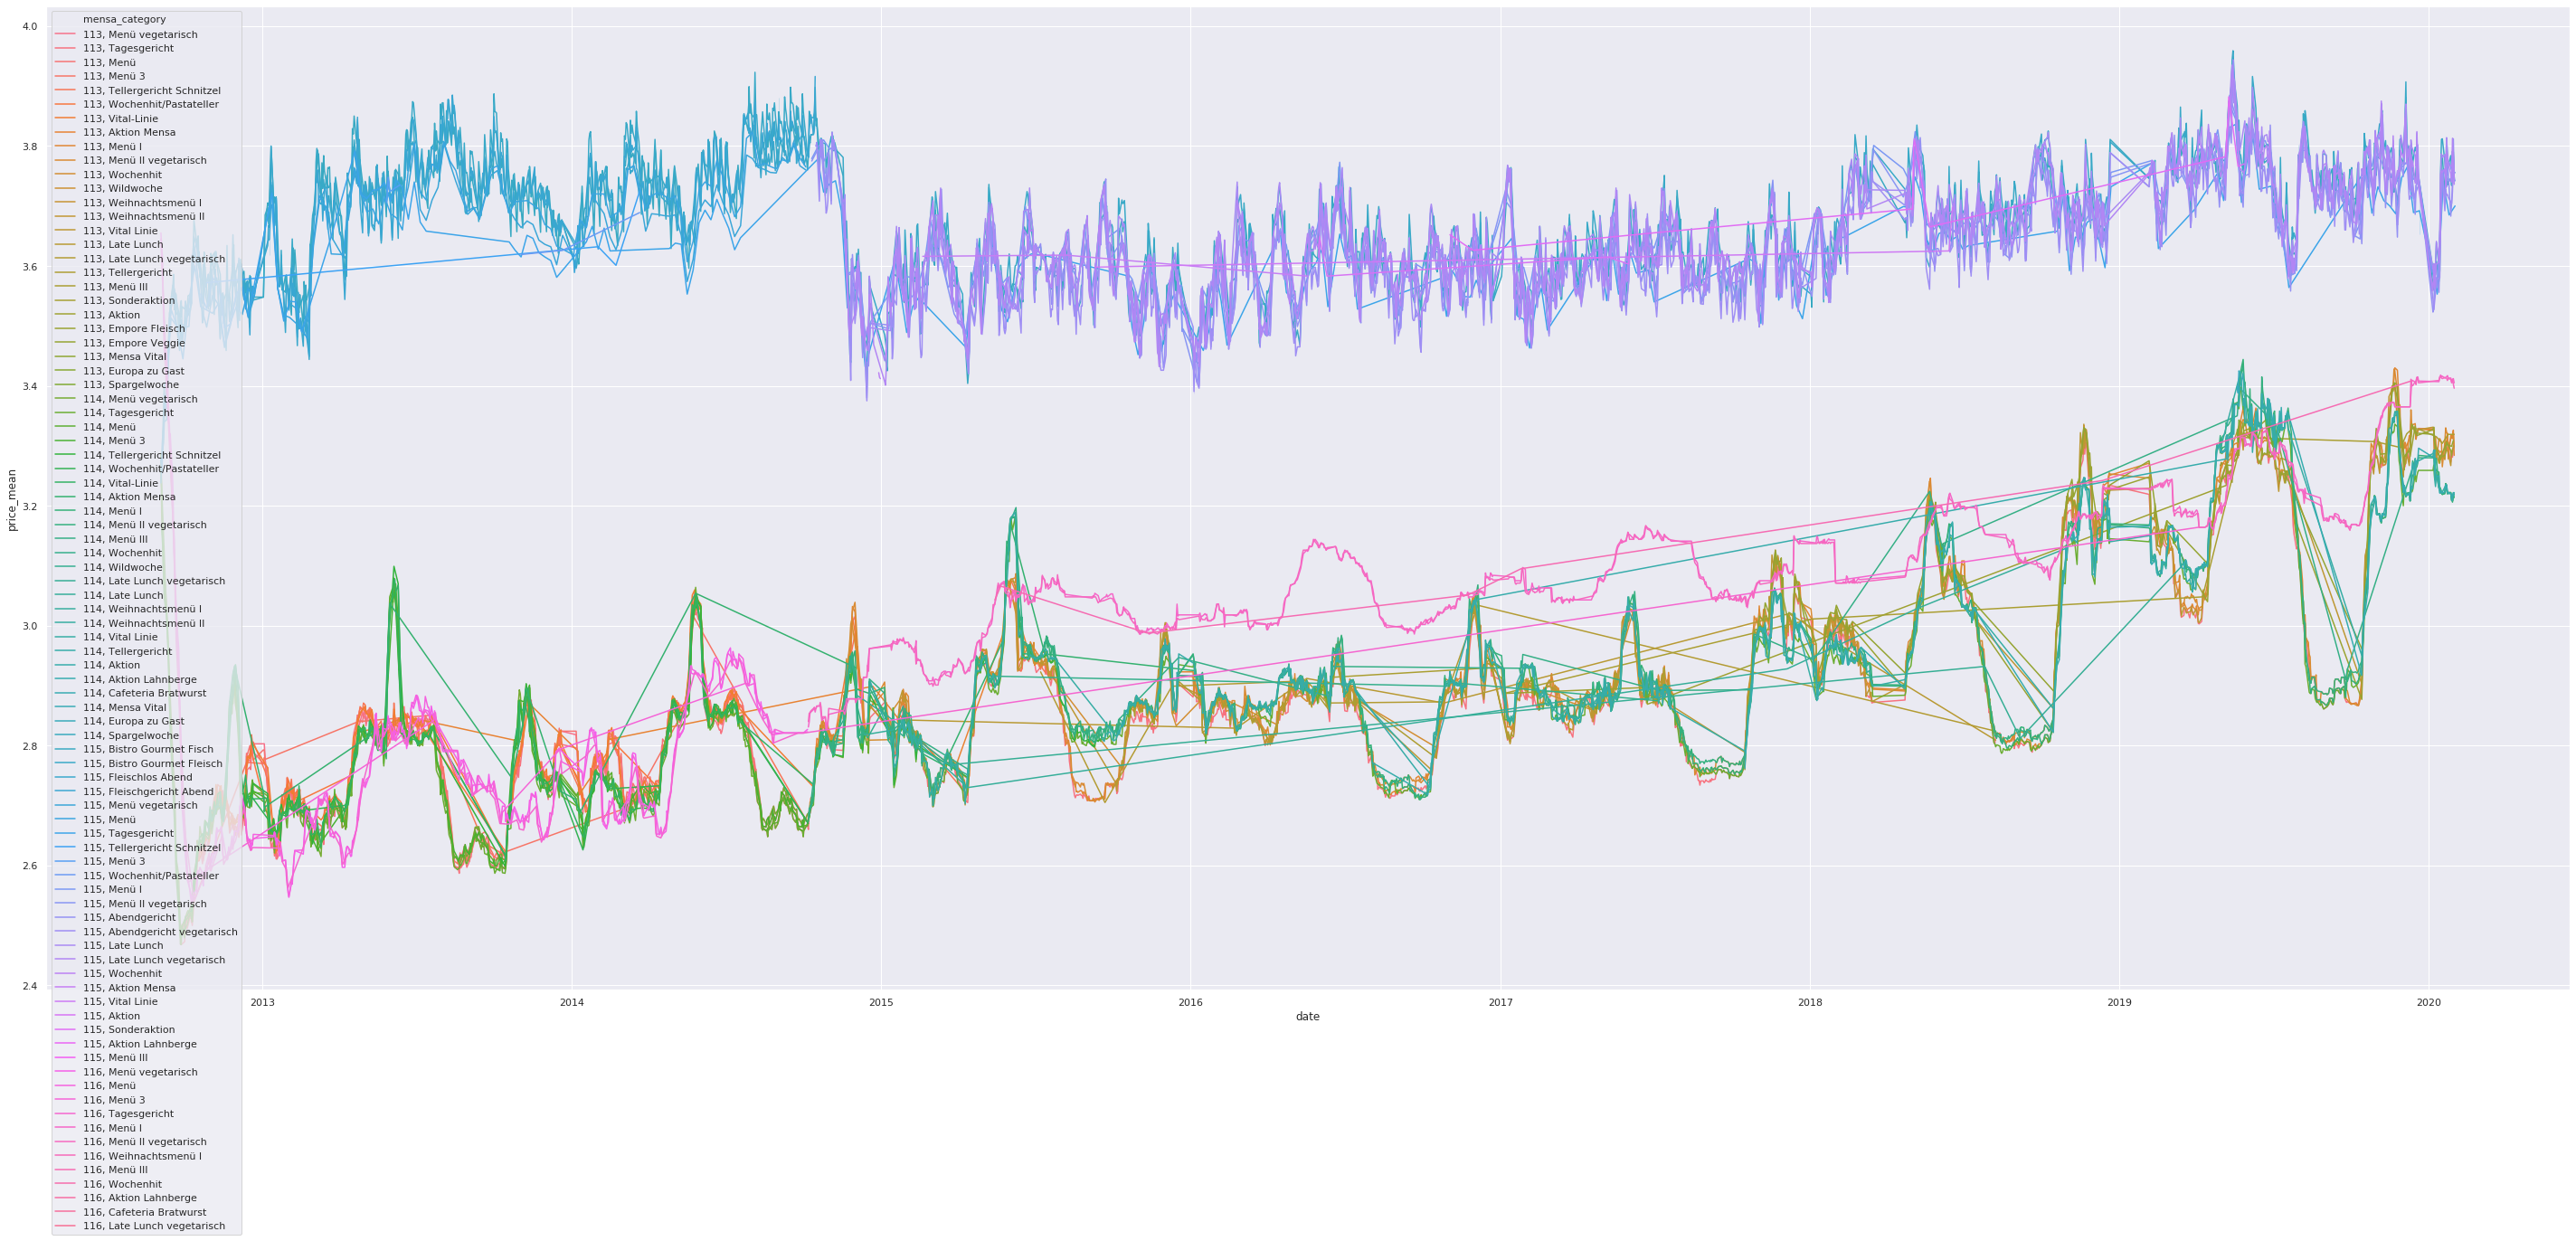

In [4]:
plt.figure(figsize=(50, 20))
sns.lineplot(x="date", y="price_mean", hue="mensa_category", data=meals)